<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass08_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization libraries
from sklearn.preprocessing import StandardScaler

# import PCA libraries
from sklearn.decomposition import PCA

# **Loading a Data Set**

In [3]:
data = pd.read_csv('/content/wine.csv')
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# **EDA**

In [4]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [7]:
data.shape

(178, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### **Looking NA values and removed it**

In [9]:
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

## **Pairplot main data set (Before Applying The PCA)**

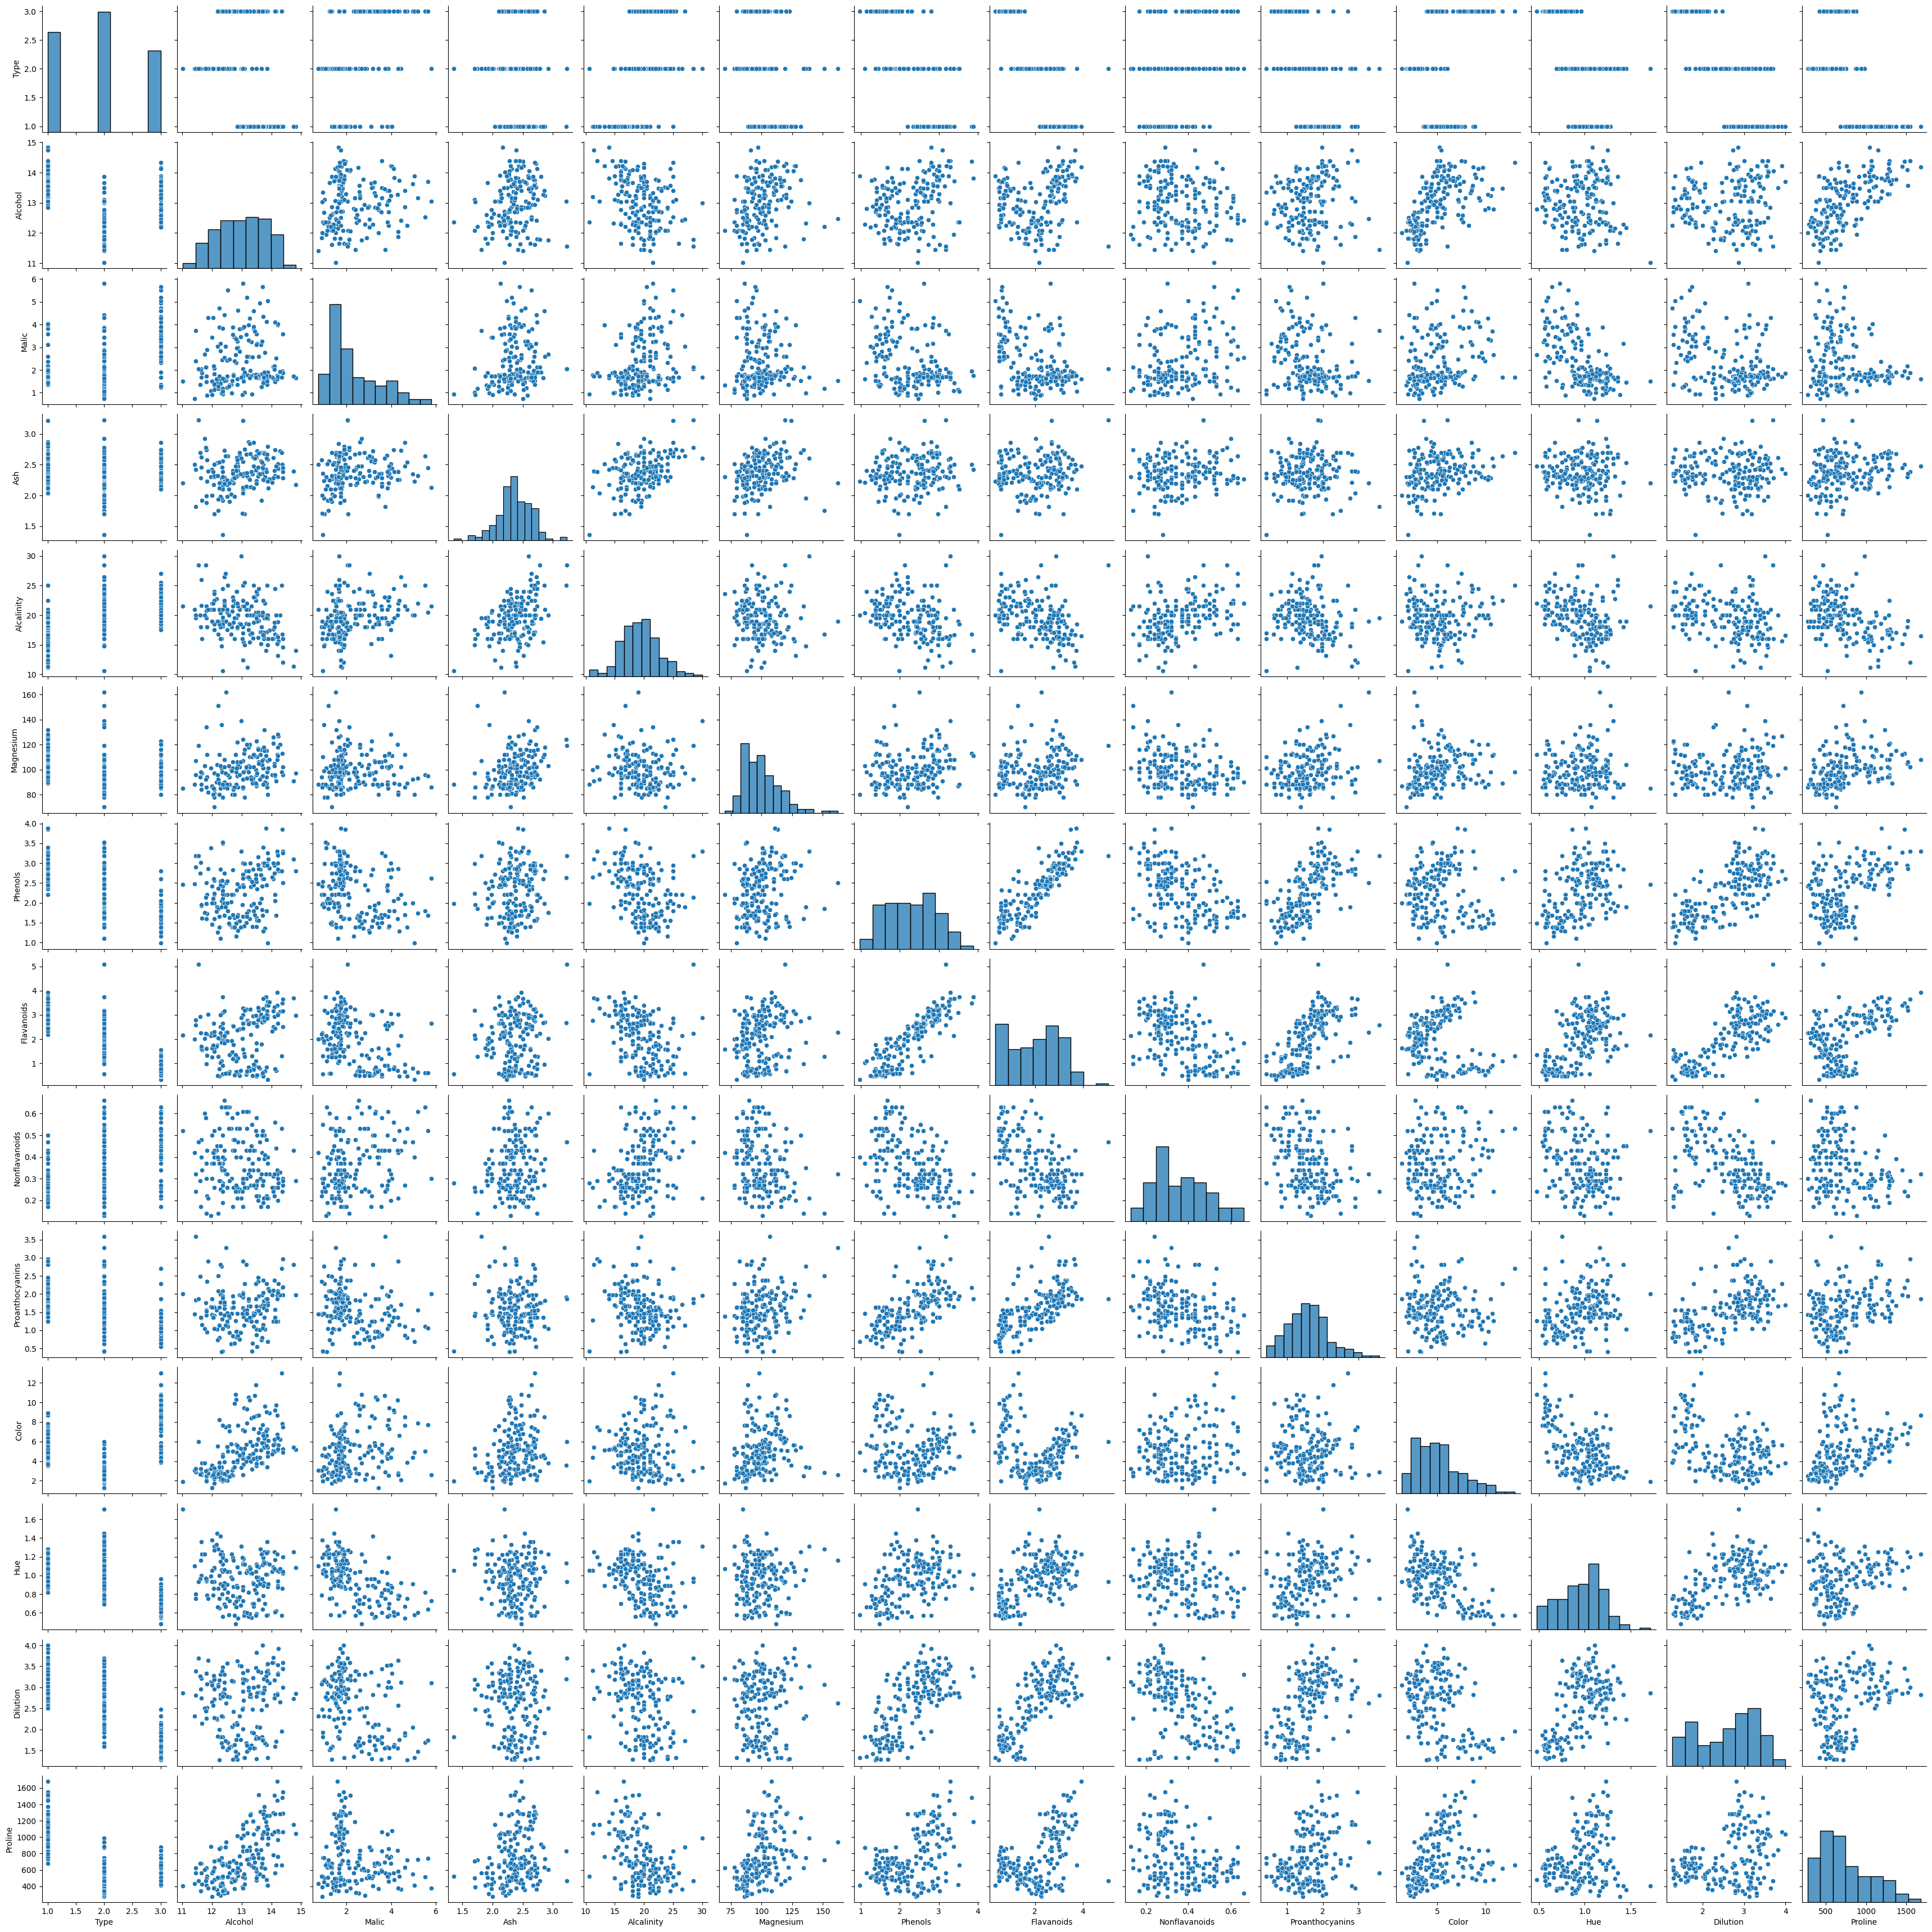

In [10]:
sns.pairplot(data)
# Here we see collinearity problem

## **Normalize the numeric data**

In [6]:
std = StandardScaler()
wine_normal = std.fit_transform(data)
wine_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# **Building PCA Model with Normalized Data**

In [14]:
pca_model =PCA()
pca_components = pca_model.fit_transform(wine_normal)

## **Pairplot main data set (After Applying The PCA)**

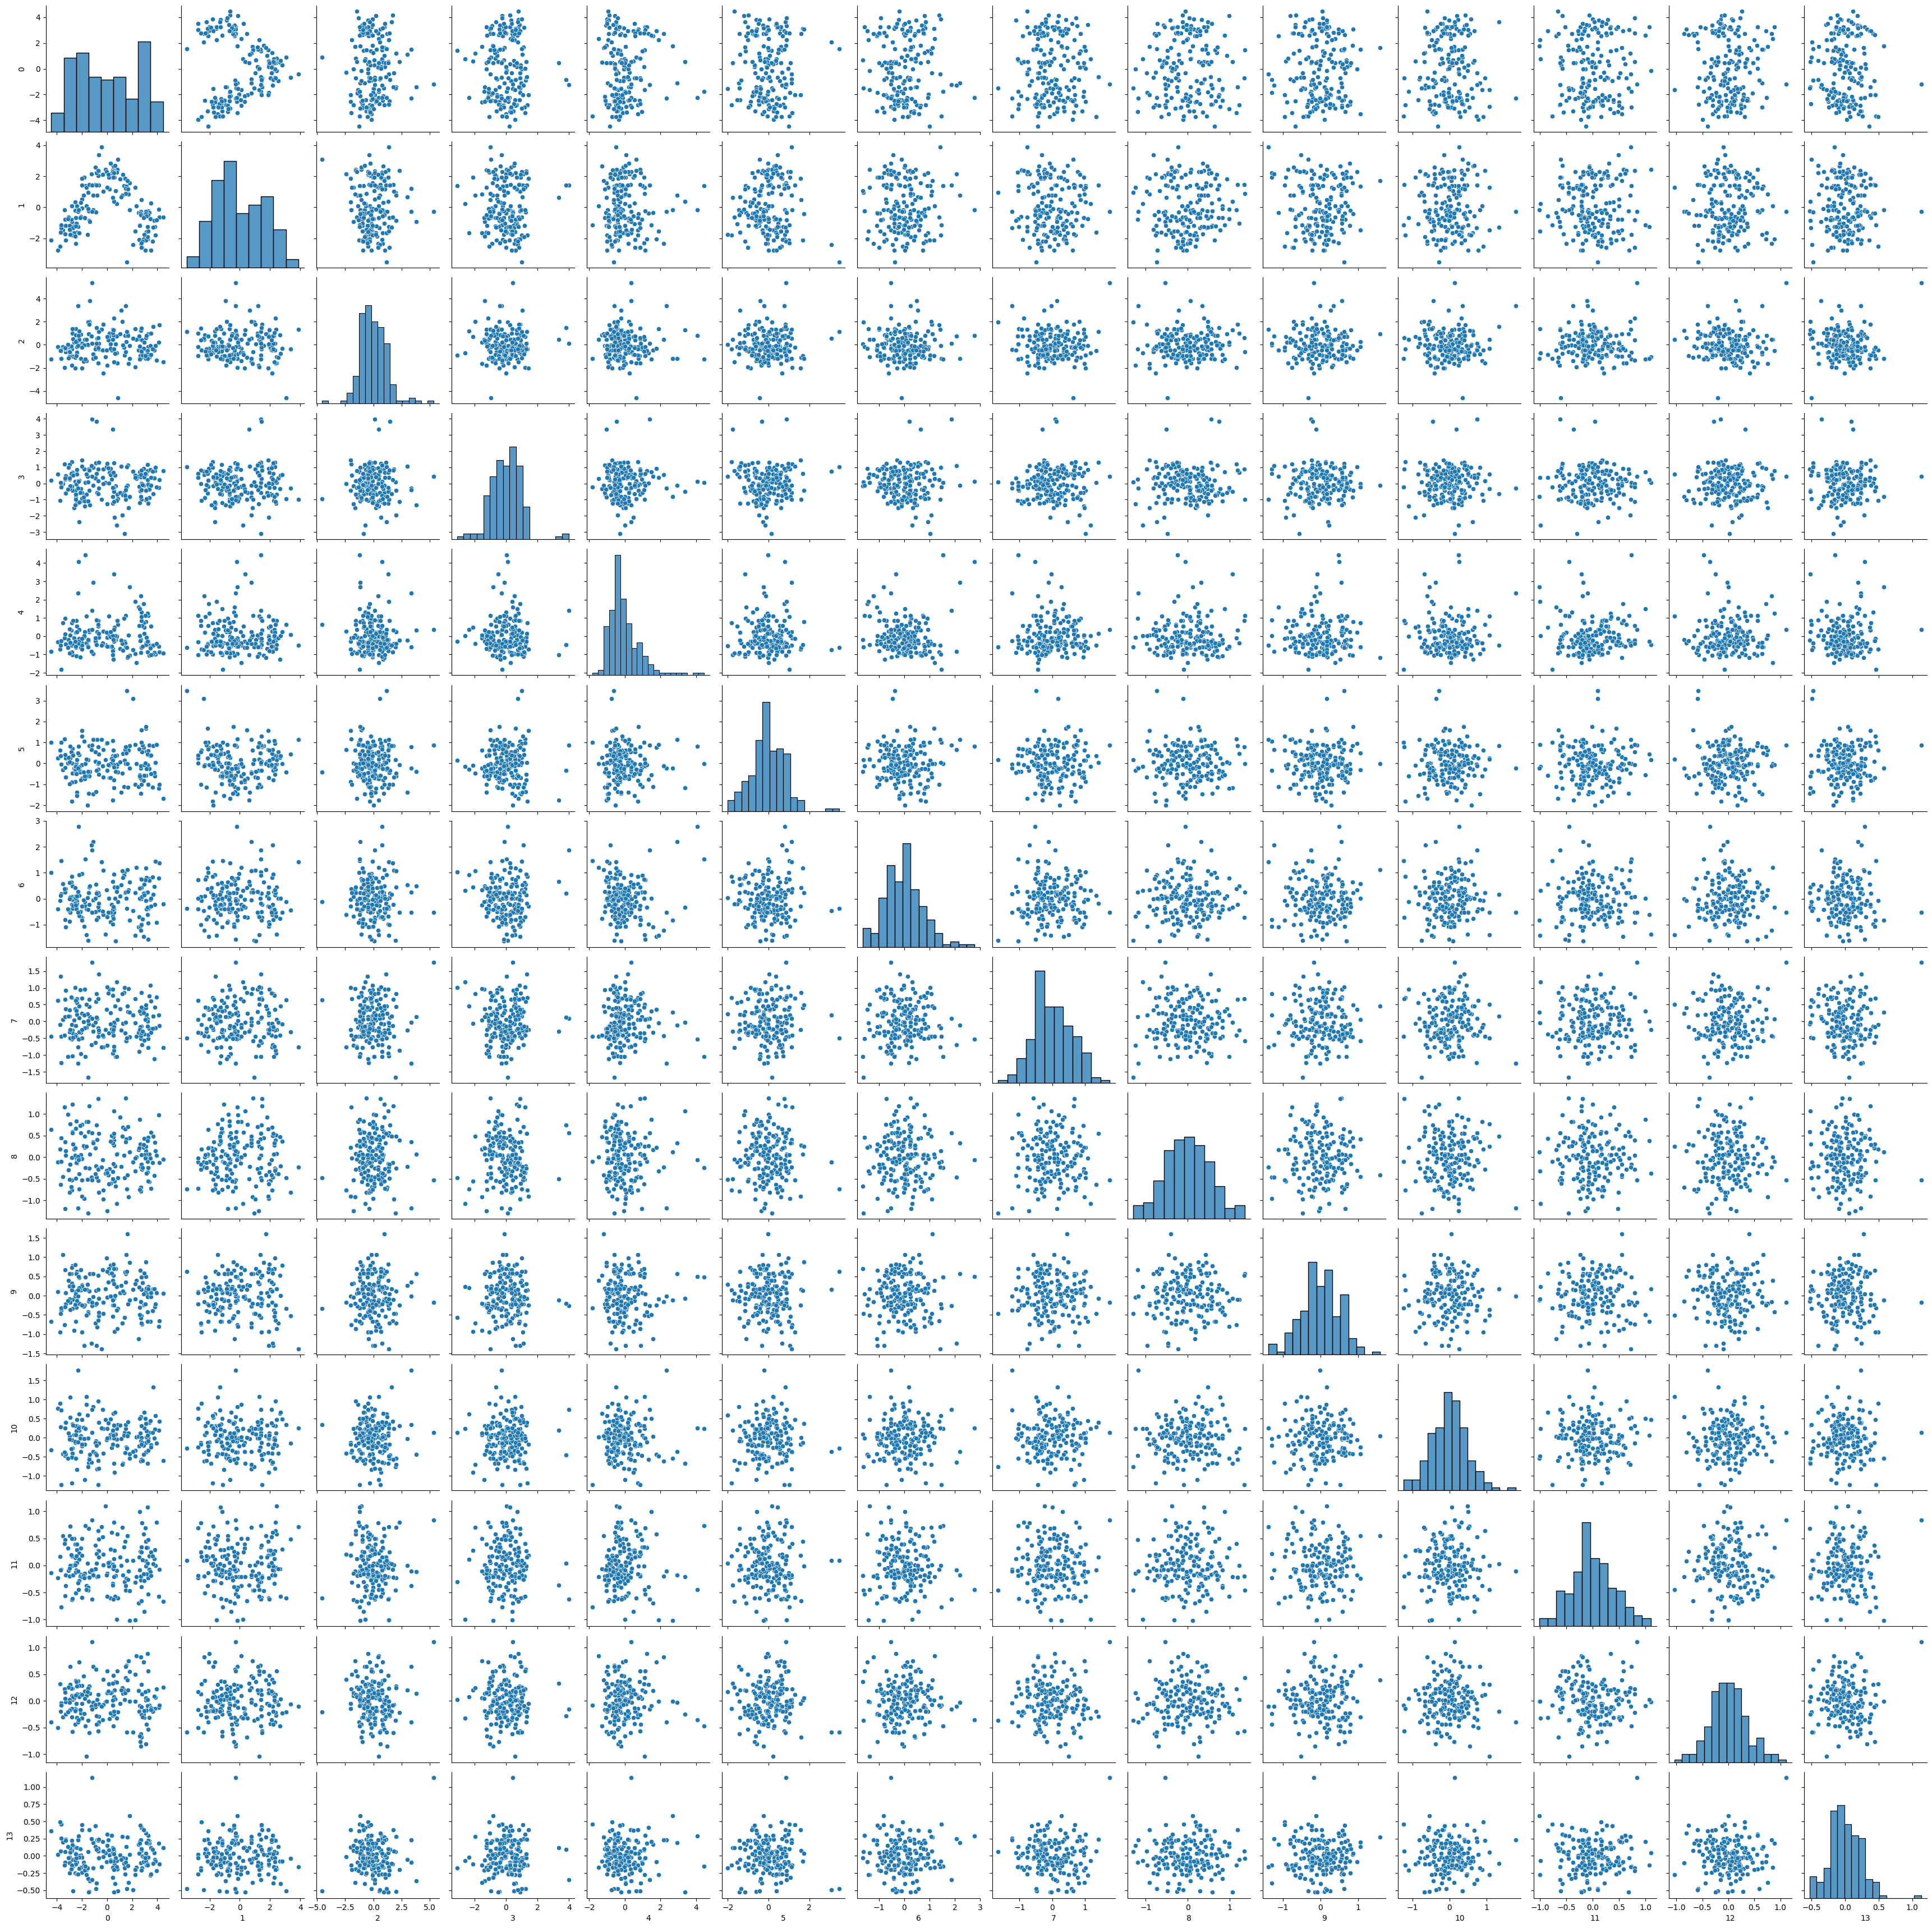

In [17]:
sns.pairplot(pd.DataFrame(pca_components))
#  Here we see no Multicollinearity problem
# Why scattrplot ? - After applying PCA there should not be any corrlation.
# PCA also remove collinearity problem

# **Calculate Variance**

In [19]:
variance = pca_model.explained_variance_
variance

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.35201176, 0.29620602, 0.26378805,
       0.2271244 , 0.16975037, 0.13029618, 0.05813894])

# **Calculate Variance persentage**

In [20]:
variance_persentage = pca_model.explained_variance_ratio_
variance_persentage

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

# **Calculate Cumilative Variance**

In [21]:
variance_cumilative = np.cumsum(np.round(variance_persentage,decimals=4)*100)
variance_cumilative

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [37]:
PCA_dataset = pd.DataFrame(data = pca_components, columns = ['component1', 'component2', 'component3', 'component4','component5', 'component6','component7', 'component8', 'component9','component10', 'component11', 'component12', 'component13','component14'] )
PCA_dataset.head(3)

component1  component2  component3  component4  component5  component6  \
0   -3.522934   -1.453098   -0.164795   -0.013273    0.737345   -0.300716   
1   -2.528858    0.330019   -2.026707   -0.417144   -0.283214   -0.884309   
2   -2.785029   -1.036936    0.983238    0.664232   -0.387565    0.468842   

   component7  component8  component9  component10  component11  component12  \
0    0.573876    0.055637   -0.458765     1.065570    -0.420494     0.552928   
1   -0.029716    1.010372    0.218806    -0.020182    -0.130020     0.394971   
2    0.488305   -0.268957    1.222769    -0.106249    -0.279074     0.001898   

   component13  component14  
0    -0.302978     0.200857  
1    -0.146645     0.126402  
2     0.021278    -0.055752

In [36]:
df_result = pd.DataFrame({'Columns':PCA_dataset.columns,
                          'Variance':variance,
                          'Variance Persentage':variance_persentage,
                          'Cumilative Variance':variance_cumilative
              })
df_result

Columns  Variance  Variance Persentage  Cumilative Variance
0    component1  5.567225             0.395425                39.54
1    component2  2.511184             0.178363                57.38
2    component3  1.454244             0.103291                67.71
3    component4  0.933160             0.066280                74.34
4    component5  0.882460             0.062679                80.61
5    component6  0.676579             0.048056                85.42
6    component7  0.556928             0.039557                89.38
7    component8  0.352012             0.025002                91.88
8    component9  0.296206             0.021039                93.98
9   component10  0.263788             0.018736                95.85
10  component11  0.227124             0.016132                97.46
11  component12  0.169750             0.012057                98.67
12  component13  0.130296             0.009255                99.60
13  component14  0.058139             0.004129               100.01

# **Some Visualization**

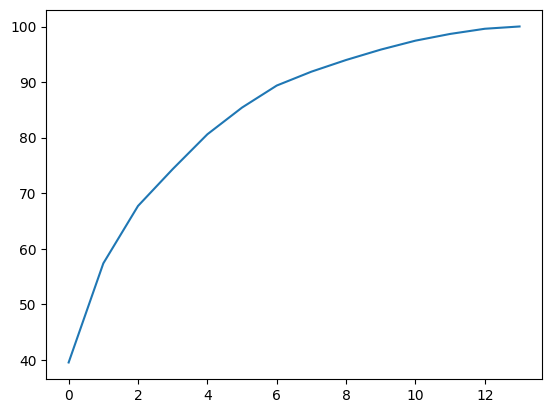

In [23]:
plt.plot(variance_cumilative)

# **Performing Some Clustering After PCA**

## **1. Hierarchical Clustering**

In [24]:
# import Hierarchical Clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [39]:
pca_new_data =  PCA_dataset.iloc[:,:5]
pca_new_data.head()

component1  component2  component3  component4  component5
0   -3.522934   -1.453098   -0.164795   -0.013273    0.737345
1   -2.528858    0.330019   -2.026707   -0.417144   -0.283214
2   -2.785029   -1.036936    0.983238    0.664232   -0.387565
3   -3.922588   -2.768210   -0.174968    0.565088   -0.324360
4   -1.407511   -0.867773    2.025829   -0.440906    0.227949

#**Create Dendrogram**

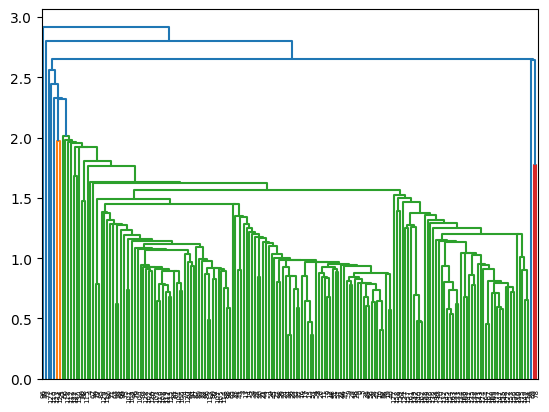

In [40]:
# single linkage method use
dendrogram = sch.dendrogram(sch.linkage(pca_new_data,method='single'))

In [41]:
hc = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage = 'single')
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=6)

## **Fit Model**

In [42]:
# save cluster for chart
y_hc = hc.fit_predict(pca_new_data)
clusters = pd.DataFrame(y_hc,columns=['Cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [43]:
clusters.head()

Cluster
0        0
1        0
2        0
3        0
4        0

## **Adding cluster column in main data**

In [44]:
# Adding cluster column in main data
pca_new_data['Hierarchical_Cluster'] = clusters
pca_new_data

<ipython-input-44-a917d0827c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_new_data['Hierarchical_Cluster'] = clusters


component1  component2  component3  component4  component5  \
0     -3.522934   -1.453098   -0.164795   -0.013273    0.737345   
1     -2.528858    0.330019   -2.026707   -0.417144   -0.283214   
2     -2.785029   -1.036936    0.983238    0.664232   -0.387565   
3     -3.922588   -2.768210   -0.174968    0.565088   -0.324360   
4     -1.407511   -0.867773    2.025829   -0.440906    0.227949   
..          ...         ...         ...         ...         ...   
173    3.627996   -2.206617   -0.343668    0.751705   -1.004109   
174    2.942729   -1.752263    0.207480    0.399381    0.154223   
175    3.027272   -2.756040   -0.940803    0.607758    1.128136   
176    2.755222   -2.293784   -0.550474   -0.391570    1.067083   
177    3.496336   -2.760608    1.013151    0.349630   -1.005136   

     Hierarchical_Cluster  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
173                     0  
174                     0  
175                     0  
176                     0  
177                     0  

[178 rows x 6 columns]

In [45]:
pca_new_data['Hierarchical_Cluster'].value_counts()

0    172
1      2
5      1
2      1
4      1
3      1
Name: Hierarchical_Cluster, dtype: int64

##**2. K-Means Clustering**

In [46]:
# Import Libraries
from sklearn.cluster import KMeans

In [52]:
pca_new_data_k = pca_new_data.iloc[:,:5]
pca_new_data_k.head()

component1  component2  component3  component4  component5
0   -3.522934   -1.453098   -0.164795   -0.013273    0.737345
1   -2.528858    0.330019   -2.026707   -0.417144   -0.283214
2   -2.785029   -1.036936    0.983238    0.664232   -0.387565
3   -3.922588   -2.768210   -0.174968    0.565088   -0.324360
4   -1.407511   -0.867773    2.025829   -0.440906    0.227949

# **Elbow Graph**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

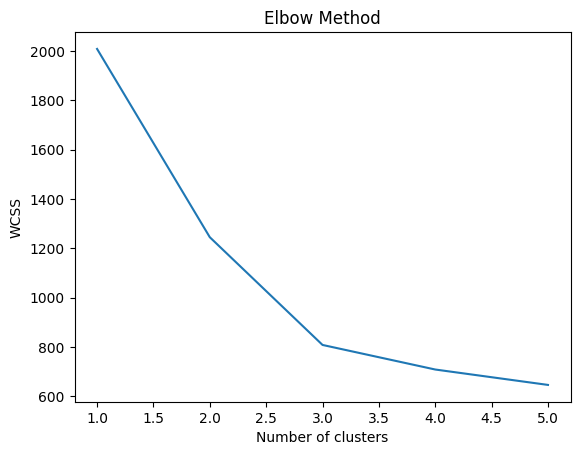

In [54]:
# within-cluster sum-of-squares criterion
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_new_data_k)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Build Cluster algorithm using K=3**

In [55]:
kmeans = KMeans(n_clusters=3,random_state=0)
predict = kmeans.fit_predict(pca_new_data_k)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [61]:
# Adding cluster column in main data
pca_new_data_k['K_Means_Cluster'] = clusters
pca_new_data_k

component1  component2  component3  component4  component5  \
0     -3.522934   -1.453098   -0.164795   -0.013273    0.737345   
1     -2.528858    0.330019   -2.026707   -0.417144   -0.283214   
2     -2.785029   -1.036936    0.983238    0.664232   -0.387565   
3     -3.922588   -2.768210   -0.174968    0.565088   -0.324360   
4     -1.407511   -0.867773    2.025829   -0.440906    0.227949   
..          ...         ...         ...         ...         ...   
173    3.627996   -2.206617   -0.343668    0.751705   -1.004109   
174    2.942729   -1.752263    0.207480    0.399381    0.154223   
175    3.027272   -2.756040   -0.940803    0.607758    1.128136   
176    2.755222   -2.293784   -0.550474   -0.391570    1.067083   
177    3.496336   -2.760608    1.013151    0.349630   -1.005136   

     K_Means_Cluster  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
..               ...  
173                0  
174                0  
175                0  
176                0  
177                0  

[178 rows x 6 columns]

In [62]:
pca_new_data_k['K_Means_Cluster'].value_counts()

0    172
1      2
5      1
2      1
4      1
3      1
Name: K_Means_Cluster, dtype: int64

In [65]:
pca_new_data_k.groupby('K_Means_Cluster').agg(['mean']).reset_index()

K_Means_Cluster component1 component2 component3 component4 component5
                        mean       mean       mean       mean       mean
0               0   0.034686  -0.029900   0.008871   0.009941  -0.103608
1               1  -1.418187   1.076825  -1.208987  -0.034045   3.688311
2               2  -2.299457  -0.274359   3.376817  -0.296032   2.343107
3               3   0.555473   0.370127   1.309239  -0.497756   3.393684
4               4  -2.260607  -0.184286   0.791708   0.111084   4.077836
5               5   0.874925   3.077724  -4.585646  -0.959098   0.629346

# **END**